In [6]:
import librosa
import IPython.display as ipd
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_ds, test_ds = tfds.load('spoken_digit', split=['train[:75%]', 'train[:25%]'], shuffle_files=True, as_supervised=True)
train_ds_np = tfds.as_numpy(train_ds)
test_ds_np = tfds.as_numpy(test_ds)

x_train = [x.astype(np.float32) for x, y in train_ds_np]
y_train = [y.astype(np.float32) for x, y in train_ds_np]

x_test = [x.astype(np.float32) for x, y in test_ds_np]
y_test = [y.astype(np.float32) for x, y in test_ds_np]

print(f"{len(x_train)}, {len(x_test)}")
print(f"{len(y_train)}, {len(y_test)}")

Fs = 8000

2025-03-19 20:40:53.164787: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 20:40:53.563511: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 20:40:53.852652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742413254.139393   22493 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742413254.222869   22493 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-19 20:40:54.825992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

1875, 625
1875, 625


2025-03-19 20:41:03.220512: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
item_index = np.random.randint(0, len(y_train), size=1)[0]

# Signal
s = x_train[item_index]
display(s.shape)

ipd.Audio(s, rate=Fs)

(3022,)

In [13]:
hop_length = 128
n_fft = 2048

In [17]:
# Spectrogram
S = librosa.stft(s, n_fft=n_fft, hop_length=hop_length)
display(S.shape)

(1025, 24)

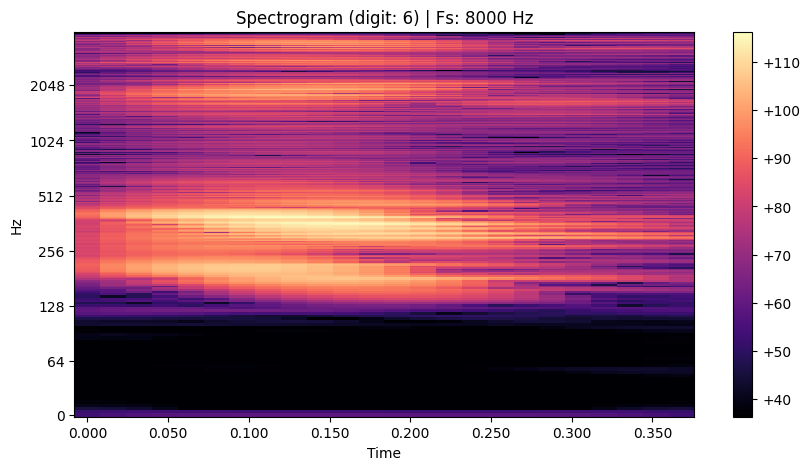

In [18]:
plt.figure(figsize=(10, 5))
plt.title(f'Spectrogram (digit: {int(y_train[item_index])}) | Fs: {Fs} Hz')
librosa.display.specshow(
    librosa.power_to_db(np.abs(S)**2), 
    sr=Fs, 
    hop_length=hop_length, 
    x_axis="time", 
    y_axis="log"
)
plt.colorbar(format="%+2.f")
